In [36]:
from pygalfitm.VOs import splus

import splusdata

conn = splusdata.connect("gustavo", "asdflkjh")

You have access to internal data


In [1]:
import sys

In [2]:
print(sys.platform)

linux


In [38]:
pygalgitm_object = splus.get_splus("test", 51.30076502619376, -32.90247622337992, 200, 'data/', 'outputs/', conn, bands=["z", "i", "r", "g", "u"])

finished
finished
finished
finished
finished


In [41]:
pygalgitm_object.print_component("sersic")

1) 100.0,100.0,100.0,100.0,100.0       1    band       # Position x [pixel]
2) 100.0,100.0,100.0,100.0,100.0       1    band       # Position y [pixel]
3) 15.117862,15.180557,15.473856,15.91864,17.890005 3    band       # Integrated magnitude
4) 14.201047,14.582276,14.020076,14.485249,13.601129 2    band       # R_e (effective radius) [pix]
5) 4,4,4,4,4                           2    band       # Sersic index n (de Vaucouleurs n=4)
9) 0.83502877,0.82830656,0.8094947,0.8186555,0.57032895 1    band       # Axis ratio (b/a)
10) 84.425285,80.77312,80.43968,82.45708,-23.020525 1    band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                                   # Skip this model in output image? (yes=1, no=0)


In [42]:
_ = pygalgitm_object.run()

In [8]:
pygalgitm_object.print_component("sersic")

1) 100.0,100.0,100.0,100.0,100.0       1    band       # Position x [pixel]
2) 100.0,100.0,100.0,100.0,100.0       1    band       # Position y [pixel]
3) 13.942189,14.022123,14.107952,14.922325,17.492119 3    band       # Integrated magnitude
4) 23.816917,25.440218,30.087149,24.733025,12.289917 2    band       # R_e (effective radius) [pix]
5) 4,4,4,4,4                           2    band       # Sersic index n (de Vaucouleurs n=4)
9) 0.8629128,0.6433851,0.7046503,0.7636552,0.51140374 1    band       # Axis ratio (b/a)
10) 46.141933,15.269562,23.058279,32.80171,78.55494 1    band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                                   # Skip this model in output image? (yes=1, no=0)


In [5]:
_ = pygalgitm_object.run()

In [10]:
from astropy.io import fits

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astropy.visualization import make_lupton_rgb

In [12]:
f = fits.open("outputs/testss.fits")

In [44]:
def read_output(filename):
    out = open(filename, "r").read()

    output = {}
    base = True
    current_component = ""

    for i in out.split("\n"):
        i.lstrip().split(" ")[0].replace(")", "")
        
        letter = i.lstrip().split(" ")[0].replace(")", "")
        
        if letter == "" or letter == "#" or len(letter) > 3:
            continue
            
        if letter == "0":
            current_component = i.lstrip().split(" ")[1]
            output[current_component] = {}
            base = False

        if base:
            output[letter] = i.lstrip().split(" ")[1]
        else:
            output[current_component][letter] = i.lstrip().split(" ")[1]

    return output

In [46]:
c = read_output("outputs/testss.galfit.01.band")

In [47]:
filters = c["A1"].split(",")

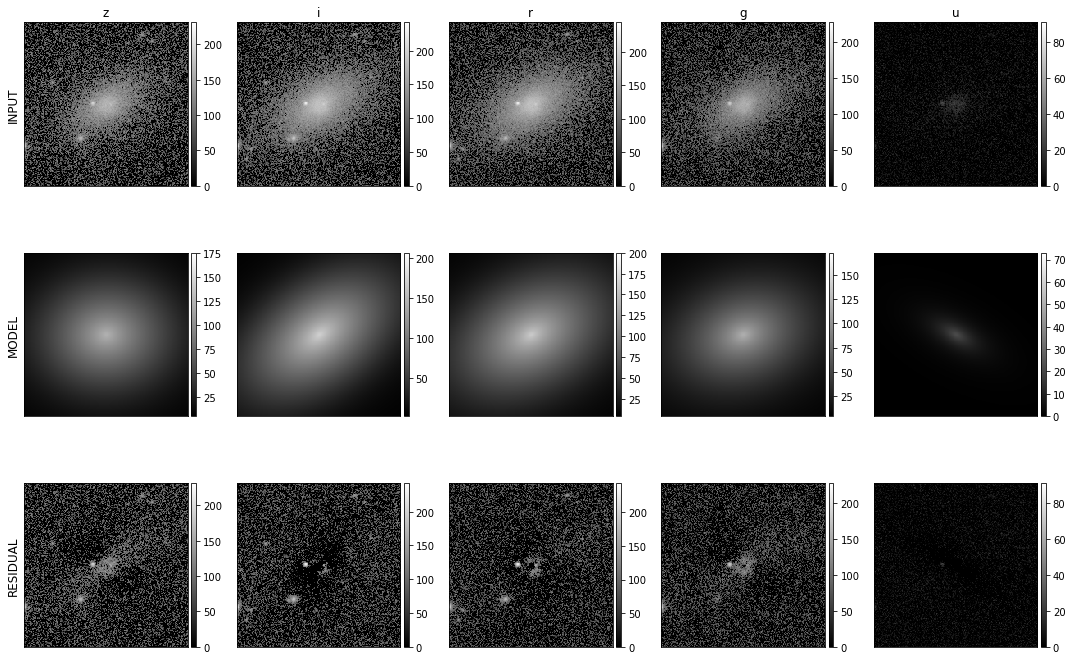

In [55]:
fig = plt.figure(figsize=(15, 10))


filters = c["A1"].split(",")
filters_index = 0

bands = len(filters)
y_label = ["INPUT", "MODEL", "RESIDUAL"]
y_label_index = 0

for i in range(1, bands * 3 + 1):
    ax = fig.add_subplot(3,5, i)
    im_data = make_lupton_rgb(f[i].data, f[i].data, f[i].data, stretch=0.2, Q=8)
    im = ax.imshow(im_data, cmap='gray', interpolation='None')
    #ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if i % bands == 1:
        ax.set_ylabel(y_label[y_label_index], rotation=90, size='large')
        y_label_index += 1
    if i <= bands:
        ax.set_title(filters[filters_index])
        filters_index += 1
        
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

fig.tight_layout()
plt.show()

In [50]:
file = fits.open("outputs/testss.fits")

In [51]:
file

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2807bd430>, <astropy.io.fits.hdu.image.ImageHDU object at 0x176433fa0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1764bb100>, <astropy.io.fits.hdu.image.ImageHDU object at 0x175519c40>, <astropy.io.fits.hdu.image.ImageHDU object at 0x281026070>, <astropy.io.fits.hdu.image.ImageHDU object at 0x281079790>, <astropy.io.fits.hdu.image.ImageHDU object at 0x281079af0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x281079dc0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1755147f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x281079850>, <astropy.io.fits.hdu.image.ImageHDU object at 0x28106e940>, <astropy.io.fits.hdu.image.ImageHDU object at 0x28106e8b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x28106eb80>, <astropy.io.fits.hdu.image.ImageHDU object at 0x28106e280>, <astropy.io.fits.hdu.image.ImageHDU object at 0x17651f5b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x17651e3a0>, <astropy.io.fits.hdu.table.BinTableHD

In [53]:
file[6].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  200 / Length of data axis 1                          
NAXIS2  =                  200 / Length of data axis 2                          
PCOUNT  =                    0 / number of random group parameters              
GCOUNT  =                    1 / number of random groups                        
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.878500000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   5.165919291670E+

In [13]:
import os
import sys

import requests

import pygalfitm

class PyGalfitm:
    """PyGalfitM wrapper class. 
    """    
    def __init__(self, executable = os.path.join(pygalfitm.__path__[0], "galfitm")):
        """Here we initialize the class with default values for the base and components. 

        Base values are in self.base variable 

        Components are stored in self.components_config
        """        
        self.feedme_path = "galfit.feedme"
        self.executable = executable

        self.base = {
            "A": {"value": "", "comment": "Input data image (FITS file)"},
            "A1": {"value": "g, r, i", "comment": "Nick names (band labels) "},
            "A2": {"value": "4770, 6231, 7625", "comment": "Effective wavelenghts"}, 
            "B": {"value": "4770, 6231, 7625", "comment": "Output data image block"}, 
            "C": {"value": "", "comment": "Sigma image name (made from data if blank or 'none')"},
            "D": {"value": "", "comment": "Input PSF image and (optional) diffusion kernel"}, 
            "E": {"value": "1", "comment": "PSF fine sampling factor relative to data "}, 
            "F": {"value": "none", "comment": "Bad pixel mask (FITS image or ASCII coord list)"}, 
            "G": {"value": "none", "comment": "File with parameter constraints (ASCII file) "},
            "H": {"value": "1    200  1  200", "comment": "Image region to fit (xmin xmax ymin ymax)"},
            "I": {"value": "200  200", "comment": "Size of the convolution box (x y)"},
            "J": {"value": "0,0,0", "comment": "Magnitude photometric zeropoint"},
            "K": {"value": "0.55  0.55", "comment": "Plate scale (dx dy)   [arcsec per pixel]"},
            "O": {"value": "regular", "comment": "Display type (regular, curses, both)"}, 
            "P": {"value": "0", "comment": "Choose: 0=optimize, 1=model, 2=imgblock, 3=subcomps"}, 
            "U": {"value": "0", "comment": ""}
        }

        self.components_config = {
            "sky" : {
                "1": {"col1": "BKGG,BKGR,BKGI", "col2": "0", "col3": "band", "comment": "Sky background at center of fitting region [ADUs]"},
                "2": {"col1": "0,0,0", "col2": "0", "col3": "band", "comment": "dsky/dx (sky gradient in x) [ADUs/pix]"},
                "3": {"col1": "0,0,0", "col2": "0", "col3": "band", "comment": "dsky/dy (sky gradient in y) [ADUs/pix]"},
                "Z": {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "sersic" : {
                "1":  {"col1": "200.0,200.0,200.0", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "200.0,200.0,200.0", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "Integrated magnitude"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "R_e (effective radius) [pix]"},
                "5":  {"col1": "4", "col2": "2", "col3": "band", "comment": "Sersic index n (de Vaucouleurs n=4)"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "expdisk" : {
                "1":  {"col1": "300", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "Integrated magnitude"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "R_s (disk scale lengths) [pix]"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "moffat" : {
                "1":  {"col1": "300", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "Total magnitude"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "FWHM"},
                "5":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "powerlaw"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "ferrer" : {
                "1":  {"col1": "300", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "Central surface brghtness [mag/arcsec^2]"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Outer truncation radius  [pix]"},
                "5":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Alpha (outer truncation sharpness) "},
                "6":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Beta (central slope)"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "psf" : {
                "1": {"col1": "0,0,0", "col2": "0", "col3": "band", "comment": "position x [pixel]"},
                "2": {"col1": "0,0,0", "col2": "0", "col3": "band", "comment": "position y [pixel]"},
                "3": {"col1": "0,0,0", "col2": "0", "col3": "band", "comment": "total magnitude "},
                "Z": {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "nuker" : {
                "1":  {"col1": "300.", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "mu(Rb)            [surface brightness mag. at Rb]"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Rb               [pixels]"},
                "5":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "alpha  (sharpness of transition)"},
                "6":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "beta   (outer powerlaw slope)"},
                "7":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "gamma  (inner powerlaw slope)"},
                "9": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "corser" : {
                "1":  {"col1": "300.", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "mu(Rb)            [surface brightness mag. at Rb]"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Rb               [pixels]"},
                "5":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "alpha  (sharpness of transition)"},
                "6":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "gamma  (inner powerlaw slope)"},
                "7": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "R_e (half-light radius)   [pix]"},
                "8": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Sersic index n (de Vaucouleurs n=4) "},
                "9": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "devauc" : {
                "1":  {"col1": "300.", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "Total magnitude"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Rs               [Pixels]"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "edgedisk" : {
                "1":  {"col1": "300.", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "central surface brightness  [mag/arcsec^2]"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "disk scale-height    [Pixels]"},
                "5":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "disk scale-length    [Pixels]"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "gaussian" : {
                "1":  {"col1": "300.", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "Total magnitude"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "FWHM               [pixels]"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            },
            "king" : {
                "1":  {"col1": "300", "col2": "1", "col3": "band", "comment": "Position x [pixel]"},
                "2":  {"col1": "357.4", "col2": "1", "col3": "band", "comment": "Position y [pixel]"},
                "3":  {"col1": "0,0,0", "col2": "3", "col3": "band", "comment": "mu(0)"},
                "4":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Rc"},
                "5":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "Rt"},
                "6":  {"col1": "0,0,0", "col2": "2", "col3": "band", "comment": "alpha"},
                "9":  {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Axis ratio (b/a)"},
                "10": {"col1": "0,0,0", "col2": "1", "col3": "band", "comment": "Position angle (PA) [deg: Up=0, Left=90]"},
                "Z":  {"col1": "0", "col2": "", "col3": "", "comment": "Skip this model in output image? (yes=1, no=0)"}
            }
        }

        self.components = [
            "sersic",
            "expdisk", 
            "moffat",
            "ferrer",
            "psf",
            "sky"
        ]

        self.active_components = []

    def check_executable(self):
        if not os.path.exists(self.executable):
            print("Executable path not found. ")
            while True:
                i = input("Do you want to download the executable? (y/n): ")
                if i == "y":
                    break 
                elif i == "n":
                    return
            
            if sys.platform == "darwin":
                print("Downloading galfitm executable from " + "https://www.nottingham.ac.uk/astronomy/megamorph/exec/galfitm-1.4.4-osx")
                r = requests.get("https://www.nottingham.ac.uk/astronomy/megamorph/exec/galfitm-1.4.4-osx")
                open(os.path.join(pygalfitm.__path__[0], "galfitm"), "wb").write(r.content)
            
            if sys.platform == "linux":
                print("Downloading galfitm executable from " + "https://www.nottingham.ac.uk/astronomy/megamorph/exec/galfitm-1.4.4-linux-x86_64")
                r = requests.get("https://www.nottingham.ac.uk/astronomy/megamorph/exec/galfitm-1.4.4-linux-x86_64")
                open(os.path.join(pygalfitm.__path__[0], "galfitm"), "wb").write(r.content)
                
            print(f"""PLEASE RUN:
                chmod +x {os.path.join(pygalfitm.__path__[0], "galfitm")}
            """)

            raise Exception(f"Run chmod +x {os.path.join(pygalfitm.__path__[0], 'galfitm')}")

    def activate_components(self, component_s : list = None):
        """This function is used to activate one or more components. 
        You may pass just a string with the component name, or a list. 

        If left in blank, the active components are reseted. 
        Args:
            component_s (list or str, optional): Component name or list. Defaults to None.

        Raises:
            Exception: Not valid component
        """        
        if component_s is None:
            self.active_components = []
            return

        if isinstance(component_s, list):
            for comp in component_s:
                if comp in self.components:
                    count = 0 
                    for i in self.active_components:
                        if comp in i:
                            count += 1

                    if count == 0:
                        self.active_components.append(comp)
                    else:
                        self.active_components.append(str(comp) + str(count))

                        self.components_config[str(comp) + str(count)] = self.components_config[str(comp)]
                        print("Added component as " + str(comp) + str(count))
                else:
                    raise Exception(f"Not valid component - {comp}")
        else:
            raise Exception(f"Parameter should be a list.")


    def set_base(self, item, value=""):
        """Function used to alter base values. 
        It's possible to pass only one value by giving the item and value to alter, or a dict with all keys and respective values.

        Ex:
            p.set_base("A1", "X")
            p.set_base("B", "Y")

            p.set_base({
                "A1": X
                "B": Y
                "C": Z
            })

        Args:
            item (str or dict): str of item name, or dict with infos.
            value (str, optional): value referred to item name. Defaults to "".

        Raises:
            KeyError: Parameter not valid
        """        
        if isinstance(item, dict):
            for i in item:
                self.base[i]["value"] = str(item[i])
        else:
            if item in self.base:
                self.base[item]["value"] = str(value)
            else:
                raise KeyError("Parameter not found in galfitm feedme base config.")
        
    def set_component(self, component, item, value = None, column = 1):
        """Function used to alter component values
        It's possible to pass only one value by giving the item and value to alter, or a dict with all keys and respective values.

        Ex:
            p.set_component("sersic", "1", "X", column=1)
            p.set_component("sersic", "1", "band", column=3)

            p.set_component("sersic", "2", "Y")
            
                OR

            p.set_component("sersic", {
                "A1": X
                "B": Y
                "C": Z
            })

                OR
            
            p.set_component("sersic", {
                "A1": (X, 1, band)
                "B": (Y, 1, band)
                "C": Z
            })

        Args:
            component (str): component name
            item (str or dict): item to change or dict with all infos. 
            value (str): Value referred in item (just used in case item is str).
            column (int, optional): Select column of change, 1, 2 or 3. Defaults to 1.

        Raises:
            Exception: Component not found.
        """        
        if column in [1, 2, 3]:
            column = 'col' + str(column)
        else:
            raise Exception("Column not valid.")
        if component in self.components_config:
            
            if isinstance(item, dict):
                for i in item:
                    if isinstance(item[i], tuple):
                        if len(item[i]) > 3:
                            raise Exception("Tuple not valid " + str(item[i]))
                        for key, val in enumerate(item[i]):
                            self.components_config[component][i]["col" + str(key + 1)] = str(val)
                    else:
                        self.components_config[component][i][column] = str(item[i])
            else:
                if item in self.components_config[component]:
                    self.components_config[component][item][column] = str(value)
        else:
            raise KeyError("Component not found.")


    def write_feedme(self, feedme_path = None):
        """Writes final feedme

        Args:
            feedme_path (str, optional): file path, if none select default file path. Defaults to None.
        """        
        if feedme_path is None:
            feedme_path = self.feedme_path
        else:
            self.feedme_path = feedme_path

        self.write_base(feedme_path)

        for component in self.active_components:
            self.write_component(component, feedme_path)
    
    def print_component(self, component):
        """Prints selected component to visualize informations

        Args:
            component (str): component name

        Raises:
            KeyError: Component not found.
        """        
        config = self.components_config[component]
        if component in self.components_config:
            for i in self.components_config[component]:
                final = i + ") " + config[i]['col1'].ljust(35) + " " + config[i]['col2'].ljust(5) + config[i]['col3'].ljust(10) + " # " + config[i]['comment']
                print(final)
        else:
            raise KeyError("Component not found.")
    
    def print_base(self):
        """Prints base params to visualize informations
        """        
        for param in self.base:
            final = str(param) + ") " + str(self.base[param]["value"]).ljust(32) + " # " + str(self.base[param]["comment"])
            print(final)


    def write_base(self, feedme_path = None):
        if feedme_path is None:
            feedme_path = self.feedme_path
        file = open(feedme_path, "w")
        for param in self.base:
            final = str(param) + ") " + str(self.base[param]["value"]).ljust(32) + " # " + str(self.base[param]["comment"]) + "\n"
            file.write(final)
        file.close()
    
    def write_component(self, component_name, feedme_path = None):
        if feedme_path is None:
            feedme_path = self.feedme_path

        if component_name in self.active_components:
            config = self.components_config[component_name]
            f = open(feedme_path, "a")
            f.write("\n\n\n")

            f.write("0) " + component_name + "\n")
            for i in self.components_config[component_name]:
                final = i + ") " + config[i]['col1'].ljust(35) + " " + config[i]['col2'].ljust(5) + config[i]['col3'].ljust(10) + " # " + config[i]['comment'] + "\n"
                f.write(final)

            f.close()
    
    def run(self):
        """Run galfitm

        Returns:
            str: output of run.
        """        
        import subprocess

        self.check_executable()
        output = subprocess.check_output(f'{self.executable} {self.feedme_path}', shell=True).decode("UTF-8")
        
        return output

In [14]:
pyg = PyGalfitm()

In [19]:
pyg.active_components

['sersic', 'sersic1']

In [18]:
pyg.activate_components(["sersic"])

Added component as sersic1
